# 판다스!
## 넘파이를 기반으로 구조화된 데이터프레임을 제공함
* 처리속도가 빠른 장점
* 숫자에 최적화된 넘파이와 대비되게 판다스는 문자열도 처리가 가능
* 테이블 구조 데이터를 조작하기때문에 컬럼와 로우를 조작함
* 판다스의 어원은 panel data 로써 판다 랑은 상관없다 조금 아쉽다...

## Series
* 데이터를 저장하는 인덱싱된 1차원 배열
* Series(data = 데이터, index = 인덱스)

In [2]:
import numpy as np
import pandas as pd

se = pd.Series([1, 2, np.nan, 4])  # np.nan 은 None 과 같은 결측값
se

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64

### isna()
* 결손값 or 결측값 을 탐지하고 수정하는 함수
* 결측값이 있을때 True 없을때 False 를 반환

In [ ]:
import numpy as np
import pandas as pd

se = pd.Series([1, 2, np.nan, 4])
se.isna()

0    False
1    False
2     True
3    False
dtype: bool

### 시리즈의 인덱싱
* 기존의 리스트 인덱싱과 동일한 문법을 사용함

In [11]:
se[0], se[1]

(1.0, 2.0)

* 시리즈를 선언할때 index를 명명할수있음

In [ ]:
se = pd.Series([1, 2, np.nan, 4], index=["a", "b", "c", "d"])
se["a"], se["b"]

(1.0, 2.0)

### 딕셔너리 타입의 시리즈
* key 가 인덱스, value 가 값이 됨

In [19]:
income = {"1월": 9500, "2월": 6200, "3월": 6050, "4월": 7000}
income_se = pd.Series(income)
income_se["1월"]

9500

### 시리즈의 인덱스와 밸류를 통해 원하는 값에 접근
* .index 를 호출해 인덱스를 반복가능 객체로 가져옴
* .values 를 호출해 값을 반복가능 객체로 가져옴

In [21]:
income = {"1월": 9500, "2월": 6200, "3월": 6050, "4월": 7000}
income_se = pd.Series(income)
income_se["1월"]
for month in income_se.index:
    print(month)
for value in income_se.values:
    print(value)

1월
2월
3월
4월
9500
6200
6050
7000


### 시리즈의 브로드캐스트 기능
* 인덱스가 서로 달라도 연산됨
* 크기나 인덱스명이 달라도 연산은 가능함 이경우는 결측값이 됨

In [25]:
mine = pd.Series([10, 20, 30], index=["korean", "english", "math"])
friend = pd.Series([70, 50, 50], index=["korean", "english", "math"])

merge = mine + friend
merge

korean     80
english    70
math       80
dtype: int64

* 인덱스가 다른경우
* 인덱스가 서로 다른경우는 결측값 이지만 순서가 다르다면 서로 찾아서 연산을 이룸

In [30]:
mine = pd.Series([10, 20, 30], index=["naver", "sk", "kt"])
friend = pd.Series([70, 50, 50], index=["kt", "naver", "sk"])

merge = mine + friend
merge

kt       100
naver     60
sk        70
dtype: int64

## 데이터프레임
* 시리즈는 1차원 구조이므로 2차원 구조를 사용하려면 데이터프레임을 사용해야함
* 시리즈와 마찬가지로 index 를 지정하지않으면 컬럼이 자동으로 부여되고 딕셔너리는 key 가 컬럼명 value 는 값이된다
* array는 행단위로 들어가고 딕녀서리는 열단위로 입력됨

In [33]:
nparray1 = np.array([[1, 2, 3], [4, 5, 6]])
display(pd.DataFrame(nparray1))

dictionary1 = {"a": ["1", "3"], "b": ["1", "2"], "c": ["2", "4"]}

display(pd.DataFrame(dictionary1))

,0,1,2
0,1,2,3
1,4,5,6


,a,b,c
0,1,1,2
1,3,2,4


In [ ]:
daeshin = {
    "open": [11650, 11100, 11200, 11100, 11000],
    "high": [12100, 11800, 11200, 11100, 11150],
    "low": [11600, 11050, 10900, 10950, 10900],
    "close": [11900, 11600, 11000, 11100, 11050],
}

daeshin_day = pd.DataFrame(daeshin)
daeshin_day

,open,high,low,close
0,11650,12100,11600,11900
1,11100,11800,11050,11600
2,11200,11200,10900,11000
3,11100,11100,10950,11100
4,11000,11150,10900,11050


In [9]:
date = ["16.02.29", "16.02.26", "16.02.25", "16.02.24", "16.02.23"]

daeshin_day = pd.DataFrame(
    daeshin, columns=["open", "high", "low", "close"], index=date
)
daeshin_day

,open,high,low,close
16.02.29,11650,12100,11600,11900
16.02.26,11100,11800,11050,11600
16.02.25,11200,11200,10900,11000
16.02.24,11100,11100,10950,11100
16.02.23,11000,11150,10900,11050


### 데이터프레임 에서 컬럼 및 인덱스 가져오기
* 컬럼을 주고 열 전체 가져오기

In [ ]:
daeshin_day.columns
daeshin_day.index

close = daeshin_day["close"]
close

16.02.29    11900
16.02.26    11600
16.02.25    11000
16.02.24    11100
16.02.23    11050
Name: close, dtype: int64

### 인덱스 를 키워드로 하고싶을때
* [] 안에는 컬럼을 기재 할수있으므로 인덱스를 키워드로 하고싶을때는 ioc 함수를 이용함

In [15]:
day_data = daeshin_day.loc["16.02.24"]
day_data

open     11100
high     11100
low      10950
close    11100
Name: 16.02.24, dtype: int64

### 데이터 프레임 만들기 예제

In [16]:
dataframe1 = pd.DataFrame(data=[4, 5, 6, 7], index=range(0, 4), columns=["A"])
dataframe1

,A
0,4
1,5
2,6
3,7


In [22]:
df = pd.DataFrame(
    np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]), columns=[10, 11, 12]
)
df.columns = ["A", "B", "C"]
print(df)
len(df)  # 행의 갯수 반환함

    A   B   C
0   1   2   3
1   4   5   6
2   7   8   9
3  10  11  12


4

### 데이터프레임의 인덱싱과 슬라이싱
* 시리즈와 마찬가지로 컬럼을 기준으로 하고
* 인덱스를 키워드로 하고싶을시 iloc를 사용함
* 키워드가 숫자형일시 슬라이싱도 가능함

In [43]:
print(df["A"][:1])
print(df.iloc[2][:2])
print(df.iloc[0:2][:2])

0    1
Name: A, dtype: int32
A    7
B    8
Name: 2, dtype: int32
   A  B  C
0  1  2  3
1  4  5  6


### 데이터 추가(행)
* loc() 함수를 통해 해당 인덱스에 데이터를 추가하는것이 가능함
* iloc() 는 불가함!!
* 다른 방법으로는 concat() 로 마지막행에 추가

In [122]:
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))
df.loc[3] = [10, 11, 12]
new_row = pd.DataFrame([[13, 14, 15]])
df = pd.concat([df, new_row], ignore_index=True)
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12
4,13,14,15


### 데이터 추가(열)

In [123]:
# df.columns = ["A", "B", "C"]
df["D"] = [5, 6, 7, 8, 9]
df[4] = [4] * 5
display(df)

df[7] = [7] * 5
display(df)

,0,1,2,D,4
0,1,2,3,5,4
1,4,5,6,6,4
2,7,8,9,7,4
3,10,11,12,8,4
4,13,14,15,9,4


,0,1,2,D,4,7
0,1,2,3,5,4,7
1,4,5,6,6,4,7
2,7,8,9,7,4,7
3,10,11,12,8,4,7
4,13,14,15,9,4,7


### 데이터 삭제
* drop(대상)
* drop 의 기본대상은 행이며 옵션으로 axis = 를 활용함

In [124]:
# df = df.drop(7, axis="columns")  # axis = 기준을 정하는것임 기본은 행임
df = df.drop([1, 2], axis="index")  # 다중행, 열 삭제도 가능함
df

,0,1,2,D,4,7
0,1,2,3,5,4,7
3,10,11,12,8,4,7
4,13,14,15,9,4,7


### 데이터 변경
* 다중데이터 변경시에는 loc 불가함 iloc 활용

In [ ]:
df.loc[0][0] = 100
df.loc[0]["B"] = 100
df.iloc[0][2] = 100
df.iloc[0][0:2] = [1, 2]  # 슬라이싱을 활용한 데이터 변경
df["C"] = 3

,0,1,2,D,4,7
0,100,2,3,10,4,7
3,10,11,12,1,4,7
4,13,14,15,9,4,7


### 데이터 정렬
* sort_values() 로 기준을 부여하여 정렬
* 정렬로 인해 뒤집힌 인덱스는 reset_index() 로 처리함

In [58]:
df = pd.DataFrame(
    {
        "cluster": [1, 1, 2, 1, 2, 3],
        "org": ["a", "a", "h", "c", "d", "w"],
        "time": [8, 6, 34, 23, 74, 6],
    }
)
display(df)

df = df.sort_values(["time"], ascending=[False])  # time 을 기준으로 내림차순 정렬
display(df)

df = df.reset_index(drop=True)  # 정렬로 인해 순서가 바뀐 인덱스 정리
display(df)

,cluster,org,time
0,1,a,8
1,1,a,6
2,2,h,34
3,1,c,23
4,2,d,74
5,3,w,6


,cluster,org,time
4,2,d,74
2,2,h,34
3,1,c,23
0,1,a,8
1,1,a,6
5,3,w,6


,cluster,org,time
0,2,d,74
1,2,h,34
2,1,c,23
3,1,a,8
4,1,a,6
5,3,w,6


### 함수

#### discribe()
* 숫자인 컬럼만 통계를 작성함, 문자 인 경우는 자동으로 제외됨

In [ ]:
df = pd.DataFrame(
    {
        "cluster": [1, 1, 2, 1, 2, 3],
        "org": ["a", "a", "h", "c", "d", "w"],
        "time": [8, 6, 34, 23, 74, 6],
    }
)

df.describe()
# 나머지 함수도 정리해라

# 데이터의 head 부분만 보여줌 (앞에서 부터 보여줌)
df.head(2)

# 뒤에서 부터 보여줌
df.tail(2)

# 행과 열을 바꿈
df.T  # transpose

df.time  # 'time' 컬럼의 데이터 보여줌

df[df.time < 10]  # 'time'이 10 미만인 데이터

,cluster,org,time
0,1,a,8
1,1,a,6
5,3,w,6


# 2025-04-14

In [ ]:
# 저번주 복습 잠깐
import pandas as pd
import numpy as np

df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]))  # 선언
# display(df)
df.loc[3] = [10, 11, 12]  # 행별로 데이터 추가
# display(df)
df = pd.concat(
    [df, pd.DataFrame([[13, 14, 15]])], ignore_index=True
)  # 행별 데이터 추가
# display(df)
df.columns = ["A", "B", "C"]  # 데이터프레임의 컬럼 바꾸기
df["D"] = list("dddd")  # 컬럼 별로 데이터 추가

df[4] = [4] * 4  # 컬럼 으로 데이터 추가
df[7] = [7] * 4
# display(df)
df = df.drop(7, axis="columns")  # 컬럼기준으로 삭제
# display(df)
df = df.drop([4, "D"], axis="columns")  # 다중 컬럼 삭제
# display(df)
df = df.drop(1, axis="index")  # 행 기준으로 삭제
# display(df)
df = df.drop([2, 3], axis="index")  # 다중 행 삭제
# display(df)

# 데이터 변경
# 다중데이터 변경시에는 loc 불가 iloc 활용
df.loc[0][0] = 100
df.loc[0]["B"] = 100
df.iloc[0][2] = 100
df.iloc[0][0:2] = [1, 2]  # 슬라이싱을 활용한 데이터 변경
df["C"] = 3

display(df)

C:\Users\main\AppData\Local\Temp\ipykernel_14320\1715750164.py:29: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.loc[0][0] = 100
C:\Users\main\AppData\Local\Temp\ipykernel_14320\1715750164.py:29: FutureWarning: Series.__setitem__ treating

,A,B,C
0,100,100,100


### 주피터노트북 으로 판다스 표 만들기

In [ ]:
import pandas as pd

month_se = pd.Series(["1월", "2월", "3월", "4월"])
income_se = pd.Series([9500, 6200, 6050, 7000])
expenses_se = pd.Series([5040, 2350, 2300, 4800])

df = pd.DataFrame({"월": month_se, "수익": income_se, "지출": expenses_se})

display(df)

,월,수익,지출
0,1월,9500,5040
1,2월,6200,2350
2,3월,6050,2300
3,4월,7000,4800


### 함수 사용해 값 표시하기

In [82]:
m_idx = np.argmax(income_se)
print("최대 수익이 발생한 월:", month_se[m_idx])
print("월 최대 수익:", income_se.max(), ", 월 평균 수익:", income_se.mean())

최대 수익이 발생한 월: 1월
월 최대 수익: 9500 , 월 평균 수익: 7187.5


### 위 데이터프레임을 이용해서 1월 부터 4월까지 매출의 합과 월 지출의 합을 출력

In [ ]:
print("동윤이네 상점 수입 합계:", f"{income_se.sum():,}원")
print("동윤이네 상점 지출 합계:", f"{expenses_se.sum():,}원")

동윤이네 상점 수입 합계: 28,750원
동윤이네 상점 지출 합계: 14,490원


RangeIndex(start=0, stop=4, step=1)

### 새로운 컬럼 생성하기
* axis = 1 은 각 행의합, axis = 0 은 각 열의 합임
* axis = "columns" == 1 , "index" == 0

In [128]:
# 데이터 생성
data = {
    "2007": [7.71, 19.02, 10.47, 10.87, 4.04, 2.01],
    "2008": [7.95, 17.71, 8.45, 10.83, 3.78, 2.05],
    "2009": [11.96, 15.00, 5.58, 7.55, 3.45, 1.50],
    "2010": [15.84, 16.70, 7.60, 9.09, 4.20, 2.25],
    "2011": [16.33, 17.48, 8.40, 7.88, 4.62, 2.54],
}

index = ["China", "EU", "US", "Japan", "Korea", "Mexico"]

df = pd.DataFrame(data, index=index)
df["total"] = df.sum(axis=1)
list(df.columns)  # 만들어진 데이터를 list로 뽑아낼수도있음

df["total"] = df[["2007", "2008", "2009", "2010", "2011"]].sum(axis="columns")
df["mean"] = df[["2007", "2008", "2009", "2010", "2011"]].mean(axis="columns")

### 데이터프레임 함수 사용시 주의사항
* 함수를 사용해 생성된 컬럼은 해당 데이터가 사라져도 이전 데이터를 유지함 컬럼을 삭제했을시에는 해당 데이터를 제외하고 다시 함수를 수행해야함

In [ ]:
df.drop("2007", inplace=True, axis="columns")
df["total"] = df[["2008", "2009", "2010", "2011"]].sum(axis="columns")
df["mean"] = df[["2008", "2009", "2010", "2011"]].mean(axis="columns")
df

,2008,2009,2010,2011,total,mean
China,7.95,11.96,15.84,16.33,59.79,11.958
EU,17.71,15.00,16.70,17.48,85.91,17.182
US,8.45,5.58,7.60,8.40,40.50,8.100
Japan,10.83,7.55,9.09,7.88,46.22,9.244
Korea,3.78,3.45,4.20,4.62,20.09,4.018
Mexico,2.05,1.50,2.25,2.54,10.35,2.070


### 열의합을 구하기
* axis = index or 0

In [127]:
df.loc["total"] = df.sum(axis=0)
df

,2008,2009,2010,2011,total,mean
China,7.95,11.96,15.84,16.33,52.08,13.0200
EU,17.71,15.00,16.70,17.48,66.89,16.7225
US,8.45,5.58,7.60,8.40,30.03,7.5075
Japan,10.83,7.55,9.09,7.88,35.35,8.8375
Korea,3.78,3.45,4.20,4.62,16.05,4.0125
Mexico,2.05,1.50,2.25,2.54,8.34,2.0850
total,101.54,90.08,111.36,114.50,1356.81,104.3700


### drop 함수의 inplace 옵션
* False 는 기존 데이터는 건드리지않고 새로 생성된 값이 리턴됨
* True 는 기존 데이터를 건드림 (리턴 값이 없어 새로 변수를 선언해서 생성할수없음)

In [144]:
d_df = pd.DataFrame(
    data=[[10, 20, 30, 40], [50, 60, 70, 80]], columns=["A", "B", "C", "D"]
)
new_df = d_df.drop("B", axis="columns", inplace=False)
display(new_df)
display(d_df)

,A,C,D
0,10,30,40
1,50,70,80


,A,B,C,D
0,10,20,30,40
1,50,60,70,80


### read_csv 함수
* csv 파일을 읽어와 데이터 프레임을 생성함
* index_col = x 은 읽어올 csv 파일의 x 번째 열을 데이터 프레임의 인덱스로 사용한다는 의미

In [155]:
# 원격지 CSV 파일 경로 설정
path = "https://github.com/dongupak/DataML/raw/main/csv/vehicle_prod.csv"

# CSV 파일을 읽어서 데이터프레임으로 만들기 (첫 번째 열을 인덱스로 설정)
df = pd.read_csv(path, index_col=0)

# 데이터 출력
display(df)

df.drop("Mexico", axis="index", inplace=True)
display(df)

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62


In [169]:
# 데이터의 인덱스를 기준으로 가져오는 여러가지 방법
df.iloc[4]
df.loc["Korea"]

2007    4.04
2008    3.78
2009    3.45
2010    4.20
2011    4.62
Name: Korea, dtype: float64

### 인덱서

In [ ]:
# 앞에서 3개 행의 데이터를 가저온후 컬럼이 2009 인 데이터
df.head(3)["2009"]

# iloc 의 차이 인덱싱 차이
df.iloc[[2, 4]]
df.iloc[2, 4]

8.4

### 판다스의 인코딩
* csv 파일을 읽어올때 encoding 옵션을 주어야 한글이 정상적으로 출력되며 에러가 발생하지않음

In [327]:
# 원격지 CSV 파일 경로 설정
path = "https://github.com/dongupak/DataML/raw/main/csv/weather.csv"

weather = pd.read_csv(path, index_col=0, encoding="CP949")

weather.head(3)
display(weather)
# shape() 해당 데이터의 행과 열의 수를 튜플로 리턴
print(f"waether 데이터의 shape : {weather.shape}")

weather.describe()
weather.count()

# isna() 결손값을 뽑아내는 함수
missing_data = weather[weather["평균풍속"].isna()]
missing_data

,평균기온,최대풍속,평균풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
...,...,...,...
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0


waether 데이터의 shape : (3653, 3)


,평균기온,최대풍속,평균풍속
일시,,,
2012-02-11,-0.7,NaN,NaN
2012-02-12,0.4,NaN,NaN
2012-02-13,4.0,NaN,NaN
2015-03-22,10.1,11.6,NaN
2015-04-01,7.3,12.1,NaN
2019-04-18,15.7,11.7,NaN


### 데이터의 정제와 결손값 처리하기
* 결손 데이터 삭제하기
* dropna() 함수 의 옵션
* how = any (결손데이터가 하나라도 포함되면 제거 대상)
* how = a;; (결손데이터가 행, 열 전체에 결손데이터가 있으면 제거 대상)
* inplace = False (원본데이터 는 유지 하고 새로 생성)
True (원본데이터를 수정)

In [319]:
new_df = weather.dropna(axis="index", how="any", inplace=False)
new_df.count()

평균기온    3646
최대풍속    3646
평균풍속    3646
dtype: int64

#### fillna 함수 이용하여 처리하기
* 결손데이터를 삭제하는것이 아닌 특정 값으로 대체함

In [ ]:
new_weather = weather.fillna(0, inplace=False)
new_weather.loc["2012-02-11"]

new_weather = weather.fillna(weather["평균풍속"].mean(), inplace=False)
new_weather.loc["2012-02-11"]

# 평균 풍속의 결손치는 평균 풍속의 평균값으로 넣고
# 최대 풍속의 결손치는 최대 풍속의 평균값으로 넣어보자
max_wind = pd.Series(weather["최대풍속"])
mean_wind = pd.Series(weather["평균풍속"])
max_wind.fillna(max_wind.mean(), inplace=True)
mean_wind.fillna(mean_wind.mean(), inplace=True)

new_weather = pd.concat([weather["평균기온"], max_wind, mean_wind], axis=1)

weather.loc["2012-02-11"]

평균기온   -0.700000
최대풍속    7.911099
평균풍속    3.936441
Name: 2012-02-11, dtype: float64

### 시계열 자료 분석
* DatetimeIndex 를 활용해 여러가지 패턴의 시계열 자료를 알아서 통일화 하여 사용할수있게 됨
* 통일화된 패턴은 yyyy-mm-dd 로 됨

In [ ]:
d_list = ["01/03/2018", "01-03-2018", "2018-01-05", "2018/01/06", "May 1,2020"]
pd.DatetimeIndex(d_list).month

dt_list = ["01,03,2028 11:12:13", "01-03-2018 11:22:13", "01-04-2019 10:22:24 PM"]
pd.DatetimeIndex(dt_list).hour
pd.DatetimeIndex(dt_list).second

Index([13, 13, 24], dtype='int32')

#### 위의 weather 를 이용한 DatetimeIndex 에제

Text(0, 0.5, 'Temperature')

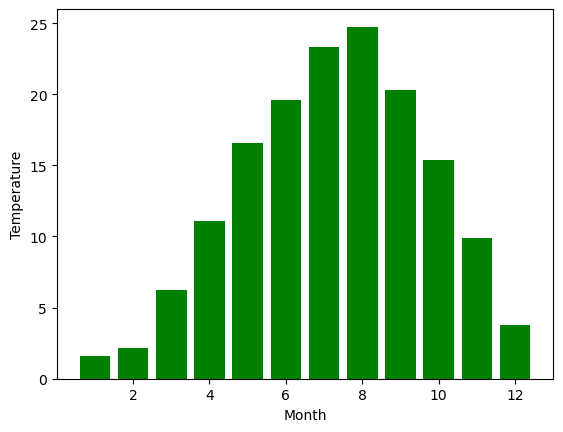

In [ ]:
import matplotlib.pyplot as plt

path = "https://github.com/dongupak/DataML/raw/main/csv/weather.csv"

# 일시를 가져와 month 컬럼을 추가 하기
weather = pd.read_csv(path, encoding="CP949")
weather["month"] = pd.DatetimeIndex(weather["일시"]).month


# 월별 평균기온으로 데이터 시각화 하기
monthly = [None for x in range(12)]
monthly_temp = [0 for x in range(12)]
for i in range(12):
    monthly[i] = weather[weather["month"] == i + 1]
    monthly_temp[i] = monthly[i]["평균기온"].mean()


months = range(1, 13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel("Month")
plt.ylabel("Temperature")

### 그룹핑과 필터링

In [6]:
path = "https://github.com/dongupak/DataML/raw/main/csv/weather.csv"
import pandas as pd

# 일시를 가져와 month 컬럼을 추가 하기
weather = pd.read_csv(path, encoding="CP949")
weather["month"] = pd.DatetimeIndex(weather["일시"]).month
weather["year"] = pd.DatetimeIndex(weather["일시"]).year

# mean() 은 숫자만 가능하나 일시는 날짜 타입으로 되어있어 불가함
# mean() 함수에 옵션으로 numeric_only = True 만 주면 숫자만 걸러 연산함
monthly_means = weather.groupby("month").mean(numeric_only=True)
yearly_means = weather.groupby("year").mean(numeric_only=True)

monthly_means
yearly_means

,평균기온,최대풍속,평균풍속,month
year,,,,
2010,15.238562,8.205229,4.069281,10.000000
2011,12.073425,8.355616,4.251233,6.526027
2012,11.892896,7.794490,3.863912,6.513661
2013,12.795068,7.859726,3.874795,6.526027
2014,12.844110,7.458904,3.816438,6.526027
2015,13.162466,7.694247,3.799449,6.526027
2016,13.243443,7.963934,3.977869,6.513661
2017,13.111233,8.001370,3.934795,6.526027
2018,13.041644,8.158630,4.085479,6.526027


#### 도전문제
* 위의 weather 데이터 프레임을 이용하여 연도별
*  평균기온을 히스토그램으로 출력
* 힌트) 그룹바이 함수와 DatetimeIndex().year 를 사용해보자
* 히스토그램은 plt.bar()

<BarContainer object of 11 artists>

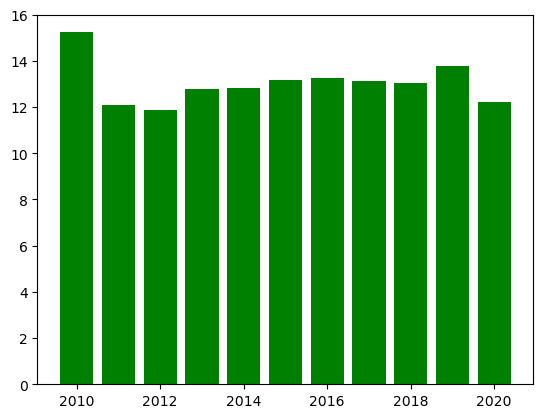

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path = "https://github.com/dongupak/DataML/raw/main/csv/weather.csv"

# 일시를 가져와 month 컬럼을 추가 하기
weather = pd.read_csv(path, encoding="CP949")
weather["year"] = pd.DatetimeIndex(weather["일시"]).year
yearly_means = weather.groupby("year").mean(numeric_only=True)
plt.bar(list(yearly_means.index), yearly_means["평균기온"], color="green")

### 데이터 구조를 변경하는 pivot()
* 인덱스가 2개 이상인경우는 pivot() 으로는 재구조화 할수없으며 pivot_table() 을 사용해야한다
* 컬럼이 2개 이상인경우도 pivot_table() 을 사용해야한다

In [28]:
df = pd.DataFrame(
    {
        "상품": ["시계", "반지", "반지", "목걸이", "팔찌"],
        "재질": ["금", "은", "백금", "금", "은"],
        "가격": [500000, 20000, 350000, 300000, 60000],
    }
)
display(df)
new_df = df.pivot(index="상품", columns="재질", values="가격")
display(new_df)
new_df.fillna(0)  # 결손값은 0으로 바꾸기

,상품,재질,가격
0,시계,금,500000
1,반지,은,20000
2,반지,백금,350000
3,목걸이,금,300000
4,팔찌,은,60000


재질,금,백금,은
상품,,,
목걸이,300000.0,NaN,NaN
반지,NaN,350000.0,20000.0
시계,500000.0,NaN,NaN
팔찌,NaN,NaN,60000.0


재질,금,백금,은
상품,,,
목걸이,300000.0,0.0,0.0
반지,0.0,350000.0,20000.0
시계,500000.0,0.0,0.0
팔찌,0.0,0.0,60000.0


#### pivot_table() 예시

In [39]:
import pandas as pd

age = [22.0, 35.0, 38.0, 26.0, 35.0]
sex = ["male", "female", "female", "male", "female"]
fare = [7.2500, 71.2833, 7.9250, 53.1000, 8.0500]
dclass = ["Third", "First", "Third", "First", "Third"]
servived = [0, 1, 1, 1, 0]
df = pd.DataFrame(
    {"age": age, "sex": sex, "class": dclass, "fare": fare, "servived": servived}
)

new_df = df.pivot_table(
    index=["class", "sex"],
    columns="servived",
    values=["age", "fare"],
    aggfunc=["mean", "max"],
)
new_df.fillna(0)

mean                        max                     
               age        fare            age        fare         
servived         0     1     0        1     0     1     0        1
class sex                                                         
First female   0.0  35.0  0.00  71.2833   0.0  35.0  0.00  71.2833
      male     0.0  26.0  0.00  53.1000   0.0  26.0  0.00  53.1000
Third female  35.0  38.0  8.05   7.9250  35.0  38.0  8.05   7.9250
      male    22.0   0.0  7.25   0.0000  22.0   0.0  7.25   0.0000

### 두개의 데이터프레임을 하나로 합치는 concat()
#### concat() 함수의 옵션
* axis = index (행에 붙이기)
* axis = colums (열에 붙이기)
* join = outer (합집합)
* join = inner (교집합)

In [63]:
df_1 = pd.DataFrame(
    {
        "A": ["a10", "a11", "a12"],
        "B": ["b10", "b11", "b12"],
        "C": ["c10", "c11", "c12"],
    },
    index=["가", "나", "다"],
)

# 두 번째 데이터프레임
df_2 = pd.DataFrame(
    {
        "B": ["b23", "b24", "b25"],
        "C": ["c23", "c24", "c25"],
        "D": ["d23", "d24", "d25"],
    },
    index=["다", "라", "마"],
)
pd.concat([df_1, df_2], axis="index", join="outer")

,A,B,C,D
가,a10,b10,c10,NaN
나,a11,b11,c11,NaN
다,a12,b12,c12,NaN
다,NaN,b23,c23,d23
라,NaN,b24,c24,d24
마,NaN,b25,c25,d25


### merge()
#### DataFrame.merge(right, how='inner', on=None)
* right = 현재 데이터프레임과 결합할 데이터프레임
* how : 결합의 방식 'left', 'right', 'inner', 'outer' 가능
* on : 조인 연산을 수행하기 위해 사용할 레이블

In [70]:
print(f"merge 전 df_1\n {df_1}")
print(f"merge 전 df_2\n {df_2}")
print("left outer \n", df_1.merge(df_2, how="left", on="B"))
print("right outer \n", df_1.merge(df_2, how="right", on="B"))
print("full outer \n", df_1.merge(df_2, how="outer", on="B"))
print("inner \n", df_1.merge(df_2, how="inner", on="B"))

merge 전 df_1
      A    B    C
가  a10  b10  c10
나  a11  b11  c11
다  a12  b12  c12
merge 전 df_2
      B    C    D
다  b23  c23  d23
라  b24  c24  d24
마  b25  c25  d25
left outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
right outer 
      A    B  C_x  C_y    D
0  NaN  b23  NaN  c23  d23
1  NaN  b24  NaN  c24  d24
2  NaN  b25  NaN  c25  d25
full outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
3  NaN  b23  NaN  c23  d23
4  NaN  b24  NaN  c24  d24
5  NaN  b25  NaN  c25  d25
inner 
 Empty DataFrame
Columns: [A, B, C_x, C_y, D]
Index: []


#### 중복된 인덱스 제거하기
* left_index, right_index 를 True 로 부여해서 적용함

In [73]:
df_3 = df_1.merge(df_2, how="outer", left_index=True, right_index=True)
df_3

,A,B_x,C_x,B_y,C_y,D
가,a10,b10,c10,NaN,NaN,NaN
나,a11,b11,c11,NaN,NaN,NaN
다,a12,b12,c12,b23,c23,d23
라,NaN,NaN,NaN,b24,c24,d24
마,NaN,NaN,NaN,b25,c25,d25


## CSV 읽기/쓰기

In [ ]:
df_1 = pd.DataFrame(
    {
        "address1": [10, 10, 10, 10, 10],
        "address2": [1, 1, 1, 2, 2],
        "jan": [413, 413, 433, 164, 165],
    }
)
df_2 = pd.DataFrame({"address1": [10, 10], "address2": [1, 3], "jan": [9812, 352]})

df_3 = df_1.merge(df_2, how="outer")
df_3 = df_1.drop_duplicates()  # 중복값 제거 하기
df_3

,address1,address2,jan
0,10,1,413
2,10,1,433
3,10,2,164
4,10,2,165
